In [43]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')

/Users/mdghayman/.pyenv/versions/3.8.6/envs/hayman_tech/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
england = data[data['RegionName']=='England']

In [15]:
X = eng_brief[['StringencyIndex']]
y = england[['ConfirmedDeaths']]

In [ ]:
pipe = Pipeline([('imputer', SimpleImputer()),
                 ('scaler', StandardScaler())])

In [16]:
y = pipe.fit_transform(y)

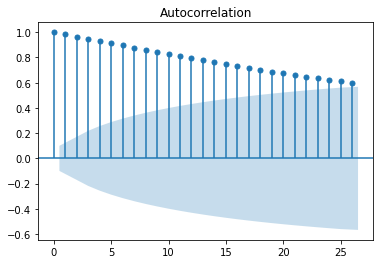

In [23]:
plot_acf(y);

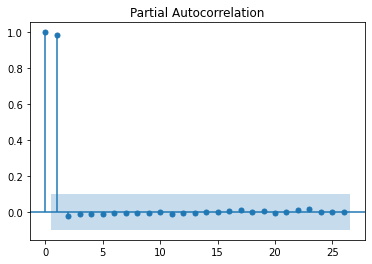

In [24]:
plot_pacf(y);

In [28]:
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

In [32]:
y_diff = np.array(difference(y, 1))

In [36]:
print(y.shape)
print(y_diff.shape)

(387, 1)
(386, 1)


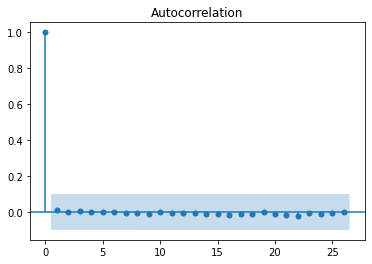

In [40]:
plot_acf(y_diff);

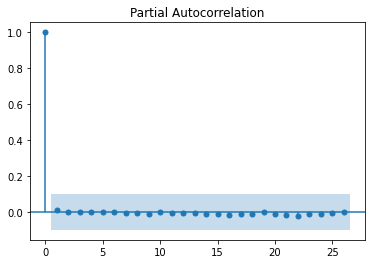

In [41]:
plot_pacf(y_diff);

In [44]:
arima = ARIMA(endog=y_diff, order=(1,1,1))

In [47]:
arima.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  386
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  99.080
Date:                Thu, 21 Jan 2021   AIC                           -192.161
Time:                        11:22:22   BIC                           -180.301
Sample:                             0   HQIC                          -187.457
                                - 386                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1936      0.248     -0.780      0.435      -0.680       0.293
ma.L1         -0.7756      0.223     -3.474      0.001      -1.213      -0.338
sigma2         0.0349      0.000    115.741      0.000       0.034       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           1853299.29
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              16.87   Skew:                           -18.08
Prob(H) (two-sided):                  0.00   Kurtosis:                       340.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""